## REFORMAT DATASET
Reformatting the layout of the overall dataset in terms of column information, tupled statsitical data, and identifying the null values.

In [69]:
#LIBRARY IMPORTS
import pandas as pd
import numpy as np
from sklearn import preprocessing as prep

In [26]:
#COMBINING ALL THE STORM DETAILS FROM THE YEARS 2007 - 2023

NaturalDisaster_Data = pd.read_csv("./Storm Dataset/StormDetails2007.csv")

#Iterate through all the Storm Details years and combine datasets to create one single large one
for year in range(2007, 2023):
    currentYear_Data = pd.read_csv(f"./Storm Dataset/StormDetails{year}.csv")
    #NaturalDisaster_Data.append(currentYear_Data, ignore_index = True)
    NaturalDisaster_Data = pd.concat([NaturalDisaster_Data, currentYear_Data])



In [27]:
NaturalDisaster_Data.columns.values

array(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE',
       'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE',
       'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE',
       'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY',
       'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE',
       'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH',
       'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype=object)

In [11]:
#Natural Disaster Dataset Size = 23,580
NaturalDisaster_Data = NaturalDisaster_Data.loc[NaturalDisaster_Data['EVENT_TYPE'] == "Tornado"]

## DATA PREPROCESSING
Cleaning up the data in terms of normalization, feature selection, and ordinally categorizing the the target variable.

In [91]:
len(NaturalDisaster_Data)

1065146

In [92]:
temp_df = NaturalDisaster_Data.copy(deep=True)

In [93]:
temp_df = temp_df.drop(columns=['BEGIN_DAY','END_YEARMONTH','END_DAY','STATE_FIPS','YEAR','MONTH_NAME',
                                                          'EVENT_TYPE','CZ_FIPS','END_DATE_TIME', 'FLOOD_CAUSE','CATEGORY',
                                                          'BEGIN_AZIMUTH','END_AZIMUTH','MAGNITUDE', 'TOR_OTHER_WFO','TOR_OTHER_CZ_STATE',
                                                          'TOR_OTHER_CZ_NAME','MAGNITUDE_TYPE', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE','BEGIN_DATE_TIME'])

In [94]:
temp_df = temp_df.dropna(subset = ['TOR_F_SCALE'])
len(temp_df)

23580

In [95]:
#Transform Damage Property and Damage To Crops Data to 0 and convert into numerical dollar values
temp_df["DAMAGE_PROPERTY"] = temp_df["DAMAGE_PROPERTY"].fillna(0.0)
temp_df["DAMAGE_CROPS"] = temp_df["DAMAGE_CROPS"].fillna(0.0)

def transform_DamageCost(damage_data, damage_column):
    damage = pd.DataFrame(damage_data)
    for index,row in damage.iterrows():
        if type(row[damage_column]) != type(0.0):
            cost = row[damage_column]
            if cost[-1:] == 'B':
                row[damage_column] = float(cost[:-1])*1000000000
            elif cost[-1:] == 'M':
                row[damage_column] = float(cost[:-1])*1000000
            elif cost[-1:] == 'K':
                row[damage_column] = float(cost[:-1])*1000

    return damage

temp_df["DAMAGE_PROPERTY"] = transform_DamageCost(temp_df["DAMAGE_PROPERTY"], "DAMAGE_PROPERTY")
temp_df["DAMAGE_CROPS"] = transform_DamageCost(temp_df["DAMAGE_CROPS"], "DAMAGE_CROPS")

In [96]:
#Transforming the TOR_F_Scale into numerical, ordinal data that takes into account the magnitude of the tornadoes
tornado_scale = pd.DataFrame(temp_df["TOR_F_SCALE"])
for index, row in tornado_scale.iterrows():
    scale = row["TOR_F_SCALE"]
    if scale[-1:] == '0' or scale[-1:] == 'U':
        row["TOR_F_SCALE"] = 0
    elif scale[-1:] == '1':
        row["TOR_F_SCALE"] = 1
    elif scale[-1:] == '2':
        row["TOR_F_SCALE"] = 2
    elif scale[-1:] == '3':
        row["TOR_F_SCALE"] = 3
    elif scale[-1:] == '4':
        row["TOR_F_SCALE"] = 4
    elif scale[-1:] == '5':
        row["TOR_F_SCALE"] = 5
temp_df["TOR_F_SCALE"] = tornado_scale

In [97]:
#Transforming label data into encoded, numerical data types
labelEn = prep.LabelEncoder()
temp_df['CZ_TYPE'] = labelEn.fit_transform(temp_df['CZ_TYPE'])
temp_df['STATE'] = labelEn.fit_transform(temp_df['STATE'])
temp_df['CZ_NAME'] = labelEn.fit_transform(temp_df['CZ_NAME'])
temp_df['WFO'] = labelEn.fit_transform(temp_df['WFO'])
temp_df['CZ_TIMEZONE'] = labelEn.fit_transform(temp_df['CZ_TIMEZONE'])
temp_df['SOURCE'] = labelEn.fit_transform(temp_df['SOURCE'])
temp_df['BEGIN_LOCATION'] = labelEn.fit_transform(temp_df['BEGIN_LOCATION'])
temp_df['END_LOCATION'] = labelEn.fit_transform(temp_df['END_LOCATION'])
temp_df['DATA_SOURCE'] = labelEn.fit_transform(temp_df['DATA_SOURCE'])

In [98]:
temp_df["TOR_F_SCALE"].unique()

array([0, 2, 1, 3, 4, 5], dtype=object)

In [99]:
temp_df['DAMAGE_PROPERTY'] = temp_df['DAMAGE_PROPERTY'].astype('float') 
temp_df['DAMAGE_CROPS'] = temp_df['DAMAGE_CROPS'].astype('float')
temp_df['TOR_F_SCALE'] = temp_df['TOR_F_SCALE'].astype('int')

In [100]:
categorical_df = temp_df.select_dtypes(include=['object']).copy()
categorical_df.head()


""
166
263
558
656
736


## DISPLAYING DATAFRAME VISUALS

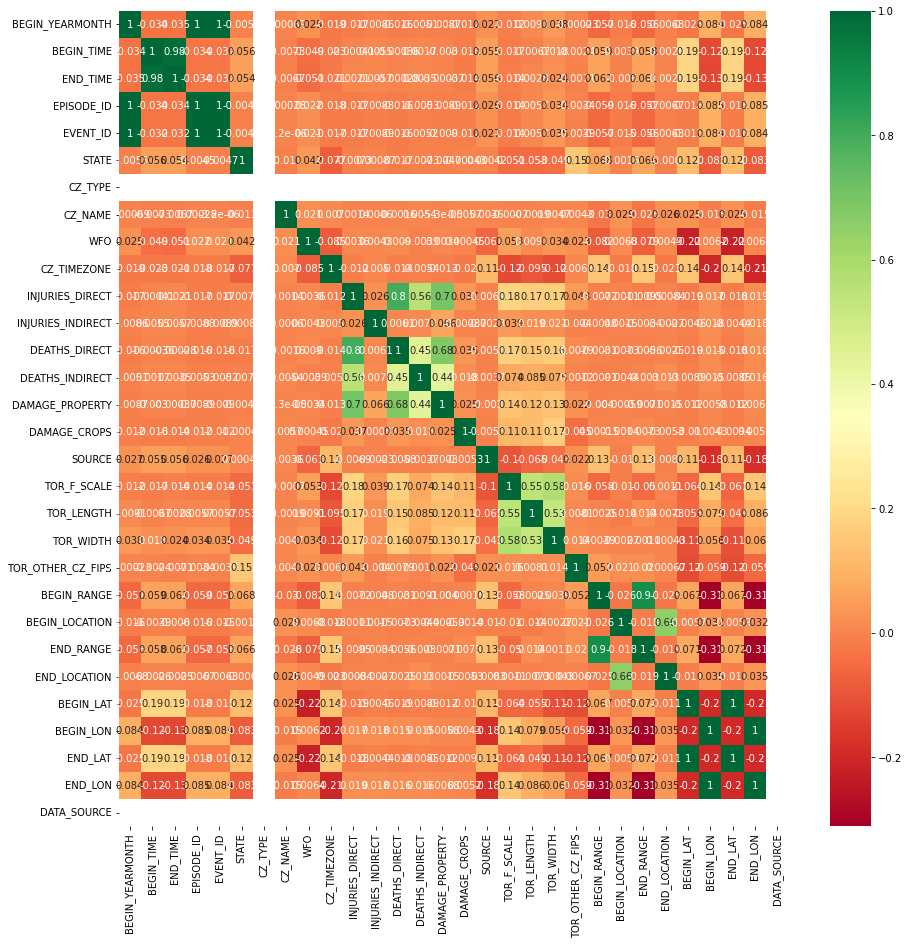

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



X = temp_df.iloc[:,0:37]
y = temp_df['TOR_F_SCALE']
#get correlations of each features in dataset
corrmat = temp_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(temp_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Columns
X = NaturalDisaster_Data.loc[:, NaturalDisaster_Data.columns!='TOR_F_SCALE']
y = NaturalDisaster_Data['TOR_F_SCALE']

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features